In [1]:
# import packages, check folders
#%reset
from pathlib import Path
import os
import numpy as np
import h5py
import pandas as pd
#import imagesc as imagesc #pip install imagesc
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import time
import pickle

%matplotlib inline

working_dir = '/Users/f0053cz/Dropbox (Dartmouth College)/postdoc_Dartmouth/HCP/fMRIScipts/code'
#working_dir = os.getcwd()
print('current directory:\n',working_dir)
path = Path(working_dir)
parent_folder = path.parent
#print('parent folder:', parent_folder)
data_file_loc = os.path.join(parent_folder,'data') # to store data we extract later in this notebook

current directory:
 /Users/f0053cz/Dropbox (Dartmouth College)/postdoc_Dartmouth/HCP/fMRIScipts/code


In [2]:
# setting default fontsizes for plots

s=16 # CHANGE FONTSIZE HERE
plt.rc('font', size=s) #controls default text size
plt.rc('axes', titlesize=s) #fontsize of the title
plt.rc('axes', labelsize=s) #fontsize of the x and y labels
plt.rc('xtick', labelsize=s) #fontsize of the x tick labels
plt.rc('ytick', labelsize=s) #fontsize of the y tick labels
plt.rc('legend', fontsize=s) #fontsize of the legend
plt.rcParams['savefig.facecolor']='white'
#import matplotlib as mpl
#mpl.rcParams['font.weight']= 'normal'


In [3]:
# get the right red/blue shades
#red_rgb = [103,0,31] # edges of RdBu
#blue_rgb = [5,48,97] # edges of RdBu
red_rgb =[188,61,62] # from Emily
blue_rgb = [54,122,177] # from Emily
red_rgb = np.array(red_rgb)/255
blue_rgb = np.array(blue_rgb)/255
alpha = .2 # transparency inside boxplots, for datapts etc.

In [4]:
# vid names as saved in behavioral data
vidnames = ["COAXING-B", "BILLIARD-A", "DRIFTING-A", "Fishing", "Random mechanical", 
            "Scaring", "SEDUCING-B", "STAR-A", "SURPRISING-B", "TENNIS-A"]

In [5]:
#loading shen atlas labels
pd.set_option('display.max_colwidth', None) # so columns are not snipped
# loading the Shen atlas labels
shen268_lbl = pd.read_csv(os.path.join(data_file_loc,"shen_dictionary.csv"))
shen268_lbl.head()
# to print an ROI: eval(shen268[str(insert ROI val between 1-268)][0])['name']

,1,2,3,4,5,6,7,8,9,10,...,259,260,261,262,263,264,265,266,267,268
0,"{'coords': [14.083200000000005, 56.6944, -16.684799999999996], 'name': '92.80% Frontal_Pole; 7.20% Frontal_Medial_Cortex'}","{'coords': [9.599999999999994, 17.61882352941177, -19.53411764705882], 'name': '60.56% Subcallosal_Cortex; 38.73% Frontal_Orbital_Cortex'}","{'coords': [5.270633397312864, 35.03262955854126, -17.5278310940499], 'name': '58.54% Frontal_Medial_Cortex; 34.55% Subcallosal_Cortex'}","{'coords': [15.647840531561457, 34.18604651162792, -22.544850498338867], 'name': '54.15% Frontal_Pole; 41.86% Frontal_Orbital_Cortex'}","{'coords': [8.283887468030684, 46.05882352941177, -1.6700767263427139], 'name': '47.25% Paracingulate_Gyrus; 25.03% Cingulate_Gyrus_anterior_division; 16.35% Frontal_Medial_Cortex; 10.86% Frontal_Pole'}","{'coords': [14.581460674157299, 64.75280898876406, 3.682584269662925], 'name': '100.00% Frontal_Pole'}","{'coords': [30.41914191419142, 54.79537953795381, -3.3267326732673297], 'name': '100.00% Frontal_Pole'}","{'coords': [44.469325153374236, 46.095092024539866, -4.917177914110425], 'name': '99.85% Frontal_Pole'}","{'coords': [28.814814814814817, 51.163163163163176, 18.73473473473473], 'name': '100.00% Frontal_Pole'}","{'coords': [8.521081081081078, 53.28, 23.885405405405407], 'name': '48.54% Frontal_Pole; 32.43% Paracingulate_Gyrus; 19.03% Superior_Frontal_Gyrus'}",...,"{'coords': [-10.399527186761233, 10.877068557919614, -8.056737588652481], 'name': '20.66% Subcallosal_Cortex; 19.95% Left_Putamen; 19.83% Left_Accumbens; 14.40% Left_Caudate; 13.81% no_label; 5.67% Frontal_Orbital_Cortex'}","{'coords': [-14.491582491582491, -3.54882154882155, 20.909090909090907], 'name': '55.03% Left_Caudate; 29.53% Left_Lateral_Ventrical; 11.07% Left_Thalamus'}","{'coords': [-24.77079107505071, 5.537525354969574, -0.07302231237322587], 'name': '96.96% Left_Putamen'}","{'coords': [-9.427230046948353, -25.539906103286384, -1.3755868544600958], 'name': '72.56% Left_Thalamus; 21.40% Brain-Stem; 5.58% no_label'}","{'coords': [-4.68474576271187, -10.2406779661017, 5.877966101694909], 'name': '82.71% Left_Thalamus; 13.90% Left_Lateral_Ventrical'}","{'coords': [-11.407792207792212, -25.563636363636363, 14.883116883116884], 'name': '61.82% Left_Thalamus; 31.43% Left_Lateral_Ventrical'}","{'coords': [-4.821052631578951, -21.51157894736842, -15.890526315789472], 'name': '71.16% Brain-Stem; 25.89% no_label'}","{'coords': [-4.227272727272734, -37.89772727272728, -53.26704545454545], 'name': '100.00% Brain-Stem'}","{'coords': [-6.9375, -33.13068181818181, -39.34659090909091], 'name': '99.15% Brain-Stem'}","{'coords': [-5.697885196374628, -18.966767371601208, -36.81570996978852], 'name': '100.00% Brain-Stem'}"


In [6]:
# load responses (nsubs * nmovies, values 0 for "no", 1 for "yes", "9" for unsure )
responses = np.load(os.path.join(data_file_loc,'responses.npy'))
responses[0,:]

array([nan,  0.,  1., nan, nan,  1.,  1.,  0.,  1.,  9.])

In [7]:
# save responses as texts with "Social", "Nonsocial" and "Neither" (so only for social v. non social comparisons) - useful for LMEs
responses_txt = []
for m in range(10):
    temp_txt = []
    temp = responses[:,m]
    for t in temp:
        if ~np.isnan(t):
            if int(t) == 1:
                temp_txt.append('Social')
            elif int(t) == 0:
                temp_txt.append('Nonsocial')
            else:
                temp_txt.append('Unsure')    
        else:
            temp_txt.append('Neither')
    responses_txt.append(temp_txt) # list of 10, each item has 1048 elements

In [8]:
tr0_ind = 3 # ind at which tr=0 starts
[timepts_indiv_movie,vid_start_rel_tr] = np.load(os.path.join(data_file_loc,'Video_TRs.npy'),allow_pickle=True)
tr_compensate = 1 # move TR back and low-level regs forward, change to 0 for what we had before
if tr_compensate==1:
    vid_start_rel_tr -= 1 # vid_start_rel_tr stored are the first timepts AFTER t=0 (these were created for regressors originally, so without subtracting 1, each index
# we get (7, 14 etc.) was when the first nonzero regressor value was to be assigned)
# so without subtracting 1, we could potentially have been losing the earliest TR (check preprocess step 1_1 to verify)
print(vid_start_rel_tr)
l_task = 28

[6 13 13 13 13 6 13 13 13 13]


In [9]:
'''def remove_pretrial_TRs(tcs,vid_start_rel_tr,pretrial_TRs):
    # remove unnecessary BOLD timepts (everything not in the range [-3:28])
    tcs1 = np.empty((tcs.shape[0],tcs.shape[1],28+pretrial_TRs,tcs.shape[3]))
    tcs1[:] = np.nan
    for vid_no in range(10):
        tr0 = vid_start_rel_tr[vid_no]
        tcs1[:,:,:,vid_no] = tcs[:,:,tr0-pretrial_TRs:tr0+28,vid_no] # 31 timepts
    return tcs1'''

'def remove_pretrial_TRs(tcs,vid_start_rel_tr,pretrial_TRs):\n    # remove unnecessary BOLD timepts (everything not in the range [-3:28])\n    tcs1 = np.empty((tcs.shape[0],tcs.shape[1],28+pretrial_TRs,tcs.shape[3]))\n    tcs1[:] = np.nan\n    for vid_no in range(10):\n        tr0 = vid_start_rel_tr[vid_no]\n        tcs1[:,:,:,vid_no] = tcs[:,:,tr0-pretrial_TRs:tr0+28,vid_no] # 31 timepts\n    return tcs1'

#  COAX-BILL

- We start by comparing a movie pair with comparable decision times

In [10]:
# COAX-BILL
#select subs who responded "Social" to COAXING-B and "Non-social" to BILLIARD-A
print('\nTrial-wise norm data.')
fileName = os.path.join(data_file_loc,'timecourses_trial_norm','timecourse-all-movies_zscorenorm.npy')
tcs_trial_z = np.load(fileName) # nsubs * nnodes * ntimepts *nmovies
#print('before:',tcs_trial_z.shape)
#tcs_trial_z = remove_pretrial_TRs(tcs_trial_z,vid_start_rel_tr,tr0_ind) # remove unwanted timepts from the fixtion blocks
#print('after:',tcs_trial_z.shape)
print(tcs_trial_z.shape)

movie_ind_yes = 0 # CHANGE MOVIE IND HERE - "Social"
movie_ind_no = 1 # CHANGE MOVIE IND HERE - "Non-social"
print('"Social" movie: ' + str(vidnames[movie_ind_yes]))
print('"Non-social" movie: ' + str(vidnames[movie_ind_no]))


Trial-wise norm data.
(1048, 268, 56, 10)
"Social" movie: COAXING-B
"Non-social" movie: BILLIARD-A


In [11]:
tcs_trial_z[0,0,:,0]

array([ 0.93485308,  0.67417715,  0.47632136,  0.40841138, -0.60058679,
        0.53302751, -0.42850166,  0.        , -1.2159385 ,  0.80498945,
       -0.21052812, -0.48721215, -0.1840827 ,  1.83730051, -0.54226248,
        1.88723356, -0.82399671,  1.26866254,  0.61636919,  1.40987249,
        2.88930598, -0.42970094,  1.56087791,  1.47328202,  2.43533712,
        1.2387954 , -1.59912368,  0.6241825 ,  1.31231767,  1.00374484,
        1.71106141,  0.58461486,  0.9694468 ,  1.5650464 ,  2.47850896,
        1.09323692,  0.29947283,  1.60671378,  1.69958707,  0.96735578,
        0.92975334,  0.80659238,  2.77253526,  1.38165407,  1.37556454,
        0.51937101,  0.54348404,  2.35301641,  0.16388497,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan])

<AxesSubplot:>

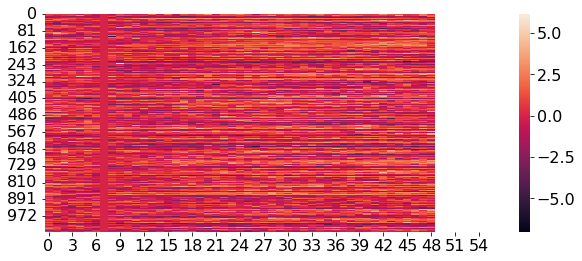

In [12]:
plt.figure(1,figsize=(10,4))
sns.heatmap(tcs_trial_z[:,0,:,0]) # the zeros (vertical band) are at TR=7, need to shift!

In [13]:
len(np.where(tcs_trial_z[:,0,vid_start_rel_tr[m]+1,m]==0)[0])

1048

In [14]:
tcs_trial_z[0,0,:,0]

array([ 0.93485308,  0.67417715,  0.47632136,  0.40841138, -0.60058679,
        0.53302751, -0.42850166,  0.        , -1.2159385 ,  0.80498945,
       -0.21052812, -0.48721215, -0.1840827 ,  1.83730051, -0.54226248,
        1.88723356, -0.82399671,  1.26866254,  0.61636919,  1.40987249,
        2.88930598, -0.42970094,  1.56087791,  1.47328202,  2.43533712,
        1.2387954 , -1.59912368,  0.6241825 ,  1.31231767,  1.00374484,
        1.71106141,  0.58461486,  0.9694468 ,  1.5650464 ,  2.47850896,
        1.09323692,  0.29947283,  1.60671378,  1.69958707,  0.96735578,
        0.92975334,  0.80659238,  2.77253526,  1.38165407,  1.37556454,
        0.51937101,  0.54348404,  2.35301641,  0.16388497,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan])

in


<AxesSubplot:>

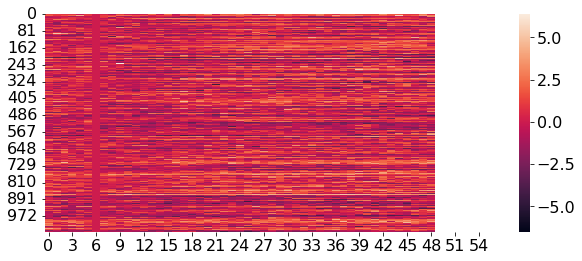

In [15]:
if tr_compensate==1:
    if len(np.where(tcs_trial_z[:,0,vid_start_rel_tr[m]+1,m]==0)[0]) == tcs_trial_z.shape[0]:
        print('in')
        for s in range(tcs_trial_z.shape[0]):
            for n in range(tcs_trial_z.shape[1]):
                for m in range(10):
                    tcs_trial_z[s,n,:,m]  = tcs_trial_z[s,n,:,m] - tcs_trial_z[s,n,vid_start_rel_tr[m],m]
plt.figure(1,figsize=(10,4))
sns.heatmap(tcs_trial_z[:,0,:,0])

In [16]:
tcs_trial_z[0,0,:,0] # baseline has shifted to index 6

array([ 1.36335474e+00,  1.10267882e+00,  9.04823020e-01,  8.36913044e-01,
       -1.72085122e-01,  9.61529177e-01,  0.00000000e+00,  4.28501664e-01,
       -7.87436833e-01,  1.23349112e+00,  2.17973539e-01, -5.87104829e-02,
        2.44418963e-01,  2.26580217e+00, -1.13760816e-01,  2.31573522e+00,
       -3.95495047e-01,  1.69716421e+00,  1.04487085e+00,  1.83837416e+00,
        3.31780764e+00, -1.19928012e-03,  1.98937958e+00,  1.90178369e+00,
        2.86383879e+00,  1.66729706e+00, -1.17062201e+00,  1.05268416e+00,
        1.74081933e+00,  1.43224651e+00,  2.13956308e+00,  1.01311653e+00,
        1.39794846e+00,  1.99354807e+00,  2.90701063e+00,  1.52173858e+00,
        7.27974496e-01,  2.03521545e+00,  2.12808874e+00,  1.39585745e+00,
        1.35825501e+00,  1.23509404e+00,  3.20103692e+00,  1.81015573e+00,
        1.80406620e+00,  9.47872670e-01,  9.71985707e-01,  2.78151808e+00,
        5.92386638e-01,             nan,             nan,             nan,
                   nan,  

In [17]:
import time
from joblib import cpu_count
from pymer4.models import Lmer,Lm
from multiprocessing import Pool
from sklearn.linear_model import LinearRegression
from joblib import Parallel,delayed

[-0.08229378]
[-0.08229378]
[-0.07797826]
[-0.07797826]


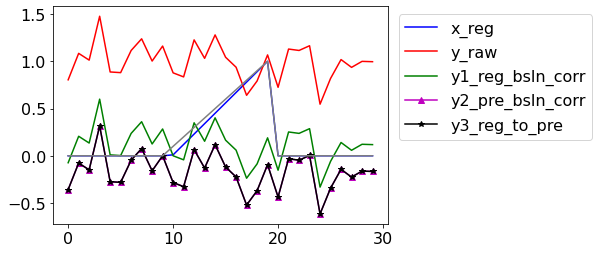

In [42]:
# testing sth here
y =  np.random.normal(1,0.2,30)
x = np.zeros((30,))
x[10:20] = np.linspace(.01,1,10)
plt.plot(x,'b', label='x_reg')
plt.plot(y,'r', label='y_raw')
y1 = y-y[10]
plt.plot(y1,'g', label='y1_reg_bsln_corr')
y2 = y-y[9]
plt.plot(y2,'m',marker = '^', label='y2_pre_bsln_corr')
y3 = y1-y1[9]
plt.plot(y3,'k',marker='*', label='y3_reg_to_pre')
plt.legend(bbox_to_anchor = [1.01,1])
for y in [y1,y2]:
    model = LinearRegression().fit(x.reshape(-1,1), y)
    print(model.coef_)
# So, no worries with correcting the error in baseline correction by now subtracting with the timept before
# (AS LONG AS BASELINE CORRECTION WAS THE LAST PREPROCESSING STEP - will need to check again otherwise)

x1 = np.zeros((30,))
x1[9:20] = np.linspace(0,1,11)
plt.plot(x1,color='grey')
for y in [y1,y2]:
    model = LinearRegression().fit(x1.reshape(-1,1), y)
    print(model.coef_)
# starting the regressor a TR before (and thereby changing the slope regressor points slightly) may have changed the (slope and) slope reg coeffts a tad bit, 
# but since this was done at the trial level,
# there is no reason why it should only affect  the "Social" - "Non-social" mean beta difference





[[2.69584024e-05 2.56396225e-01]]
[[0.03566141 0.03566141]]
[[2.69584024e-05 2.56396225e-01]]


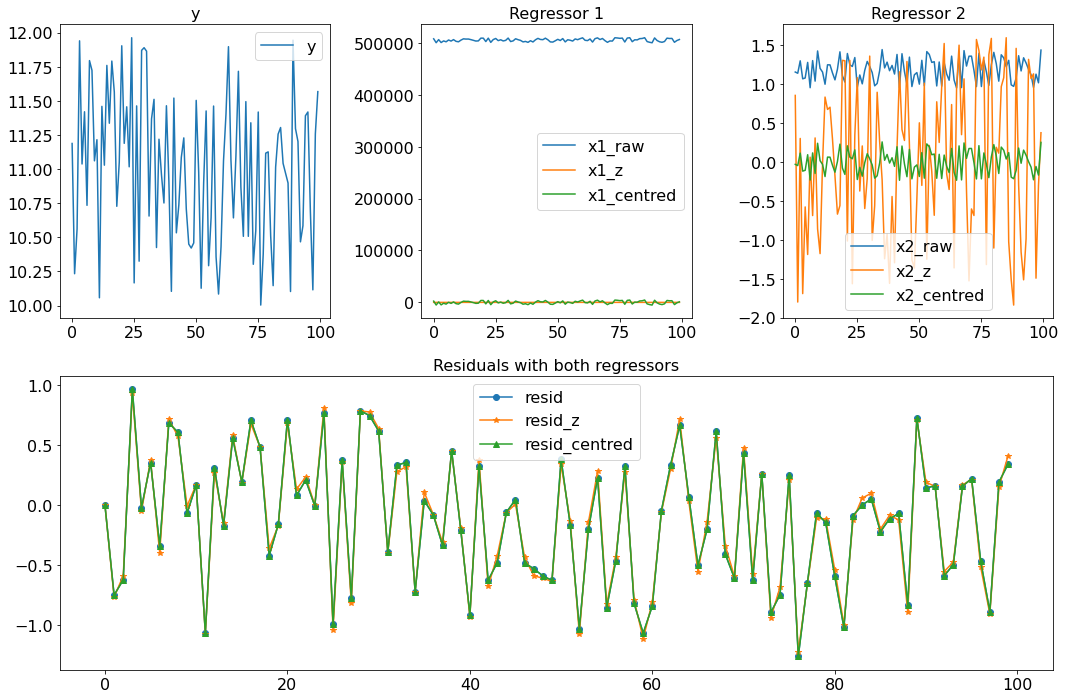

In [45]:
plt.figure(1,figsize=(15,10))
plt.subplot(231)
y =  np.random.rand(100,1)*2+ 10
plt.plot(y,label='y')
plt.legend()
plt.title('y')

plt.subplot(232)
x = np.random.rand(100,1)*10000+ 500000
plt.plot(x,label='x1_raw')
x_z = stats.zscore(x)
plt.plot(x_z,label='x1_z')
x_scale = x - x.mean()
plt.plot(x_scale, label='x1_centred')
plt.legend()
plt.title('Regressor 1')


plt.subplot(233)
x2 = np.random.rand(100,1)*.5+ .95
plt.plot(x2,label='x2_raw')
x2_z = stats.zscore(x)
plt.plot(x2_z,label='x2_z')
x2_scale = x2 - x2.mean()
plt.plot(x2_scale, label='x2_centred')
plt.legend()
plt.title('Regressor 2')

plt.subplot(212)
reg = np.array([x,x2]).squeeze().T
model1 = LinearRegression().fit(reg, y)
print(model1.coef_)
resid = y-model1.predict(reg)
plt.plot(resid- resid[0], marker= 'o', label = 'resid')
#print(resid_scale-resid_scale[0])

reg_z = np.array([x_z,x2_z]).squeeze().T
model2 = LinearRegression().fit(reg_z, y)
print(model2.coef_)
resid_z = y-model2.predict(reg_z)
plt.plot(resid_z-resid_z[0], marker= '*', label = 'resid_z')
#print(resid_scale-resid_scale[0])

reg_scale = np.array([x_scale,x2_scale]).squeeze().T
model3 = LinearRegression().fit(reg_scale, y)
print(model3.coef_)
resid_scale = y-model3.predict(reg_scale)
plt.plot(resid_scale-resid_scale[0],marker= '^', label = 'resid_centred')
#print(resid_scale-resid_scale[0])
plt.legend()
plt.title('Residuals with both regressors')

plt.tight_layout()

(31, 10)


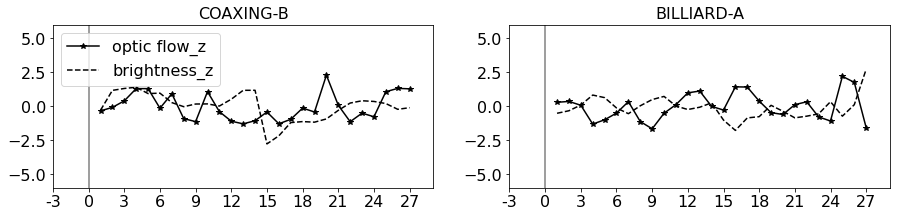

In [46]:
z_score = 1 # change to 1 to get z-scored values

# load low-level properties timecourses
if z_score==1:
    brightness_reg_1 = np.load('brightness_reg_all_z.npy')
    of_reg_1 = np.load('optic_flow_reg_all_z.npy')
else:
    brightness_reg_1 = np.load('brightness_reg_all.npy')
    of_reg_1 = np.load('optic_flow_reg_all.npy')

#brightness_reg_1 -= brightness_reg_1[tr0_ind] # may be wrong to baseline-correct this. 
#of_reg_1 -= of_reg_1[tr0_ind]

# if the first fmri TR is BEFORE t=0, push low-level regs to a later TR
if tr_compensate==1:
    of_reg, brightness_reg = [np.empty((31,10)) for _ in range(2)]
    of_reg[:], brightness_reg[:] = [np.nan]*2
    of_reg[1:,:] = of_reg_1[:-1,:] # shift all regressors 1 index to the right (so that optflow 0 is ). Reason: the first non-NaN value is at index 3 (4th timept)
    # corresponding to the first TR before stim onset. Hence, all timepts needs to be moved by one pt to the right (because there's no optic flow at the pre-stimulus
    # baseline TR).
    brightness_reg[1:,:] = brightness_reg_1[:-1,:]
else:
    of_reg,brightness_reg = of_reg_1,brightness_reg_1

print(of_reg.shape)
plt.figure(1,figsize=(15,3))
for m in range(2):
    plt.subplot(1,2,m+1)
    plt.ylim(-6,6)
    plt.plot(of_reg[:,m],color='k',label='optic flow_z',marker = '*')
    plt.plot(brightness_reg[:,m],color='k',ls='dashed', label='brightness_z')
    plt.vlines(tr0_ind,plt.ylim()[0],plt.ylim()[1],color='grey')
    plt.title(vidnames[m])
    plt.xlim(0,32)
    xticks = np.arange(0,32,3)
    plt.xticks(xticks,[str(i-tr0_ind) for i in xticks])
    if m==0:
        plt.legend()

In [ ]:
of_reg_1[:,0],of_reg[:,0],brightness_reg_1[:,0],brightness_reg[:,0]

In [70]:
for m in range(2):
    print(np.where(np.isnan(of_reg[:,m]))[0])

[0 1 2 3]
[0 1 2 3]


In [52]:
tr_compensate  # should always be 1!!

1

In [54]:
#subs who respondec "Social" to COAXING-B and "Non-social" to BILLIARD-A
movie_ind_yes,movie_ind_no = 0,1
subs = np.where((responses[:,movie_ind_yes] == 1)&(responses[:,movie_ind_no] == 0))[0] 
nsubs = np.where(subs)[0].shape[0]
subs.shape, nsubs


((870,), 870)

In [55]:
def return_residuals(df,plotfig =0):
    # df: rows: ranging from tr-14 or the earliest TR to TR+28+14, columns: 0: BOLD, 1: optic flow, 2: brightness
    # plotfig: 1(plot) or 0(don't plot)
    # returns: residuals of the same dimension as nr of rows in df
    
    rows = ~(np.isnan(df[:,0])) & ~(np.isnan(df[:,1])) & ~(np.isnan(df[:,2]))
    total_len = df.shape[0]
    if len(np.where(rows)[0]) != total_len: # if NaN is present
        df_nonan = df[rows,:]
        y,regs = df_nonan[:,0],df_nonan[:,1:]
    else:
        y,regs = df[:,0],df[:,1:]
    
    #for i in range(2):
    #    regs[:,i] =  np.convolve(regs[:,i], hrf)[:regs.shape[0]]
    
    model = LinearRegression().fit(regs, y)
    #model = LinearRegression().fit(df_nonan[:,1:], df_nonan[:,0])
    resid = y - model.predict(regs)
 
    if plotfig:
        plt.plot(df[:,0],label='raw TC')
        plt.plot(df[:,1],label='optflow',color='grey')
        plt.plot(df[:,2],label='brightness',color='grey',ls='dashed')
        plt.plot(resid,label = 'residual TC1')
        plt.legend(bbox_to_anchor=[1.01,1])
    #print(resid1-resid)
    return resid

In [56]:
z_score

1

Text(0.5, 0, 'Time')

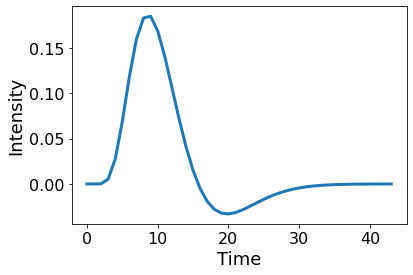

In [57]:
#defining the hrf
from nltools.external import glover_hrf

tr = .72
#hrf function
hrf = glover_hrf(tr, oversampling=1)
plt.plot(hrf, linewidth=3)
plt.ylabel('Intensity', fontsize=18)
plt.xlabel('Time', fontsize=18)

In [71]:
# create convolved regressors for coax-bill
reg_all = []
for m in range(2):
    reg = np.zeros((len(timepts_indiv_movie[m]),2))
    inds = np.arange(vid_start_rel_tr[m]+1,vid_start_rel_tr[m]+l_task) # first pt. should be the first timept AFTER stimulus (i.e, 1st pt after tr0_ind)
    for ireg in range(2): 
        if ireg==0:
            reg[inds,0] = of_reg[tr0_ind+1:,m] #np.linspace(.01,1,len(inds))
        else:
            reg[inds,1] = brightness_reg[tr0_ind+1:,m] #np.linspace(.01,1,len(inds))
        reg[:,ireg] = np.convolve(reg[:,ireg], hrf)[:reg.shape[0]]

    reg_all.append(reg)
reg_all[1].shape

(56, 2)

In [72]:
# take a long time, look through before running!!!!
load_resid_coaxbill = 0 # 1: load residuals, 0: compute residuals
if load_resid_coaxbill == 0:
    resid_tc = np.empty((tcs_trial_z.shape[0],268,31,2)) #subs, nodes, timepts, movies
    resid_tc[:] = np.nan
    start_time = time.time()
    parallelise = 0
    
    for s in np.arange(tcs_trial_z.shape[0]):
        if (s%20 == 0) and (s!=0):
            print(s, f'time elapsed: {(time.time()-start_time)/60:.2f}')

        for m in range(2):
            df = []
            for n in range(268):
                if  m%5 == 0:
                    y = tcs_trial_z[s,n,:49,m]
                else:
                    y = tcs_trial_z[s,n,:,m]
                df.append(np.array([y,reg_all[m][:,0],reg_all[m][:,1]]).T)

            if parallelise:
                residuals_ = Parallel(n_jobs=10)(delayed(return_residuals)(y) for y in df)  # pool.map(return_residuals,df_coax) 
            else:
                residuals_ = []
                for n in range(268):
                    #print(n)
                    #resid_tc[s,n,tr0_ind:,m] =   return_residuals(np.array([tcs_trial_z[s,n,tr0_ind:,m],of_reg[tr0_ind:,m],brightness_reg[tr0_ind:,m]]).T)                    
                    #resid_tc[s,n,tr0_ind:,m] =   return_residuals(df[n])     
                    residuals_.append(return_residuals(df[n]))                 

            tmin,tmax = vid_start_rel_tr[m]-tr0_ind,vid_start_rel_tr[m]+28
            for n in range(268):
                res_n = residuals_[n][tmin:tmax]
                res_n -= res_n[tr0_ind]
                resid_tc[s,n,:,m] = res_n
    #if z_score==1:
    if tr_compensate==1:
        np.save(os.path.join(data_file_loc,'residuals_tc_z_trialwise_earlyTR.npy'),resid_tc)
    else:
        np.save(os.path.join(data_file_loc,'residuals_tc_z_trialwise_lateTR.npy'),resid_tc)
    #else:
    #    np.save(os.path.join(data_file_loc,'residuals_tc.npy'),resid_tc)
else:
    #if z_score==1:
    if tr_compensate==1:
        resid_tc = np.load(os.path.join(data_file_loc,'residuals_tc_z_trialwise_earlyTR.npy'))
    else:
        resid_tc = np.load(os.path.join(data_file_loc,'residuals_tc_z_trialwise_lateTR.npy'))
    #else:
    #    resid_tc = np.load(os.path.join(data_file_loc,'residuals_tc.npy'))

20 time elapsed: 0.05
40 time elapsed: 0.10
60 time elapsed: 0.16
80 time elapsed: 0.21
100 time elapsed: 0.30
120 time elapsed: 0.36
140 time elapsed: 0.41
160 time elapsed: 0.46
180 time elapsed: 0.51
200 time elapsed: 0.57
220 time elapsed: 0.62
240 time elapsed: 0.67
260 time elapsed: 0.73
280 time elapsed: 0.78
300 time elapsed: 0.84
320 time elapsed: 0.89
340 time elapsed: 0.95
360 time elapsed: 1.00
380 time elapsed: 1.06
400 time elapsed: 1.11
420 time elapsed: 1.17
440 time elapsed: 1.22
460 time elapsed: 1.28
480 time elapsed: 1.33
500 time elapsed: 1.39
520 time elapsed: 1.44
540 time elapsed: 1.50
560 time elapsed: 1.55
580 time elapsed: 1.60
600 time elapsed: 1.66
620 time elapsed: 1.71
640 time elapsed: 1.76
660 time elapsed: 1.82
680 time elapsed: 1.87
700 time elapsed: 1.92
720 time elapsed: 1.97
740 time elapsed: 2.02
760 time elapsed: 2.08
780 time elapsed: 2.13
800 time elapsed: 2.19
820 time elapsed: 2.24
840 time elapsed: 2.29
860 time elapsed: 2.34
880 time elapse

<AxesSubplot:>

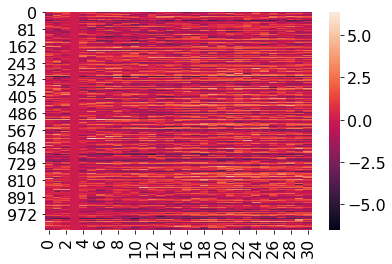

In [73]:
sns.heatmap(resid_tc[:,0,:,0])

In [74]:
vid_start_rel_tr[m]

13

/Users/f0053cz/anaconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:45: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


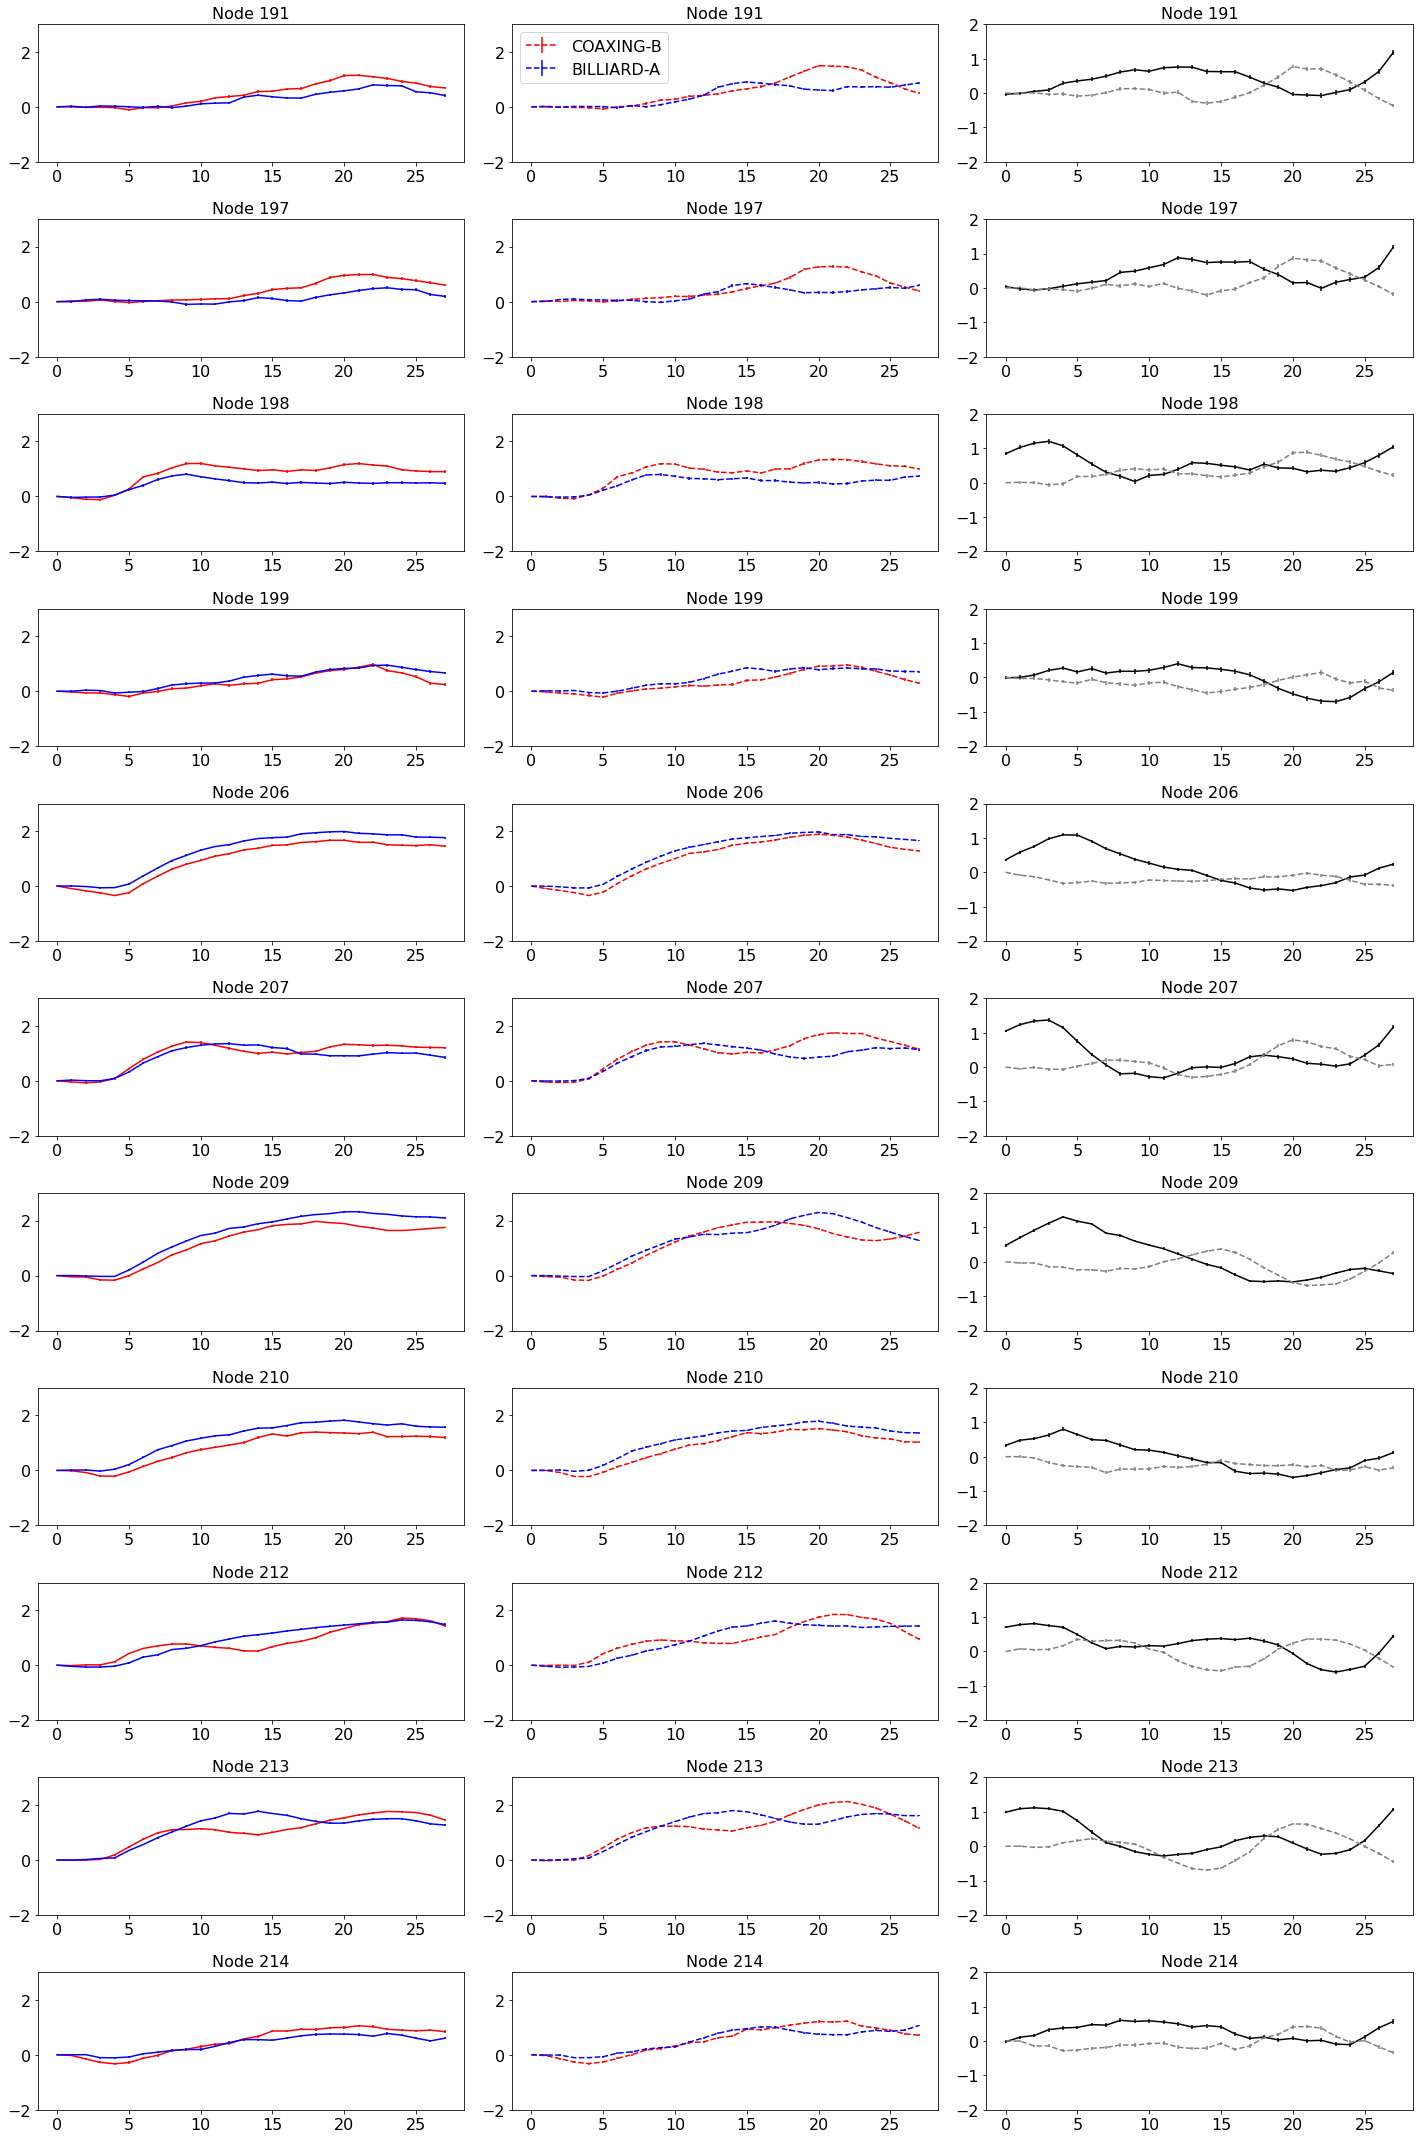

In [78]:
'''n = 65
plt.figure(1,figsize=(10,5))
for i in range(2):
    plt.subplot(1,2,i+1)
    tc_res = resid_tc[:,n,tr0_ind:,i]
    tc = tcs_trial_z[subs,n,tr0_ind:,i]
    plt.errorbar(range(28),np.nanmean(tc,axis=0),stats.sem(tc,axis=0),color='k',label='mean data')
    plt.plot((brightness_reg[tr0_ind:,i])/(max(brightness_reg[tr0_ind:,i])-min(brightness_reg[tr0_ind:,i])))
    plt.plot((of_reg[tr0_ind:,i])/(max(of_reg[tr0_ind:,i])-min(of_reg[tr0_ind:,i])))
    plt.errorbar(range(28),np.nanmean(tc_res,axis=0),stats.sem(tc_res,axis=0),color='k',ls='dashed',label = 'mean resid')
    plt.legend()
    plt.title(vidnames[i])'''

plt.figure(1,figsize=(20,30))
ncols = 3
for i,n in enumerate([190,196,197,198,205,206,208,209,211,212,213]):#df_minus10_0_right['Nodes'].values):
    #n = 65
    plt.subplot(11,ncols,i*ncols+1)
    col = ['r','b']
    plt.title('Node ' + str(n+1))
    for m in range(2):
        tc = tcs_trial_z[subs,n,vid_start_rel_tr[m]:vid_start_rel_tr[m]+28,m]
        plt.errorbar(range(28),np.nanmedian(tc,axis=0),stats.sem(tc,axis=0),color=col[m],label=vidnames[m])
        #plt.plot((brightness_reg[tr0_ind:,i])/(max(brightness_reg[tr0_ind:,i])-min(brightness_reg[tr0_ind:,i])))
        #plt.plot((of_reg[tr0_ind:,i])/(max(of_reg[tr0_ind:,i])-min(of_reg[tr0_ind:,i])))
    plt.ylim(-2,3)
        
    plt.subplot(11,ncols,i*ncols+2)
    plt.title('Node ' + str(n+1))
    for m in range(2):
        tc_res = resid_tc[:,n,tr0_ind:,m]
        plt.errorbar(range(28),np.nanmedian(tc_res,axis=0),stats.sem(tc_res,axis=0),color=col[m],ls='dashed',label = vidnames[m])
        
    if i==0:
        plt.legend()#bbox_to_anchor=[1.01,1])
    plt.ylim(-2,3)

    plt.subplot(11,ncols,i*ncols+3)
    col = 'k'
    plt.title('Node ' + str(n+1))
    tc_diff = tcs_trial_z[subs,n,vid_start_rel_tr[m]:vid_start_rel_tr[m]+28,0] - tcs_trial_z[subs,n,vid_start_rel_tr[m]:vid_start_rel_tr[m]+28,1]
    plt.errorbar(range(28),np.nanmedian(tc_diff,axis=0),stats.sem(tc_diff,axis=0),color=col,label=f'{vidnames[1]}-\n{vidnames[0]}')
    plt.ylim(-2,2)

    plt.subplot(11,ncols,i*ncols+3)
    col = 'grey'
    plt.title('Node ' + str(n+1))
    resid_diff = resid_tc[:,n,tr0_ind:,0] - resid_tc[:,n,tr0_ind:,1]
    plt.errorbar(range(28),np.nanmedian(resid_diff,axis=0),stats.sem(resid_diff,axis=0),color=col,ls='--')#,label=f'{vidnames[1]}-\n{vidnames[0]}')
    #plt.legend()
    plt.ylim(-2,2)
    
plt.tight_layout()

# not soted early to late.

/Users/f0053cz/anaconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


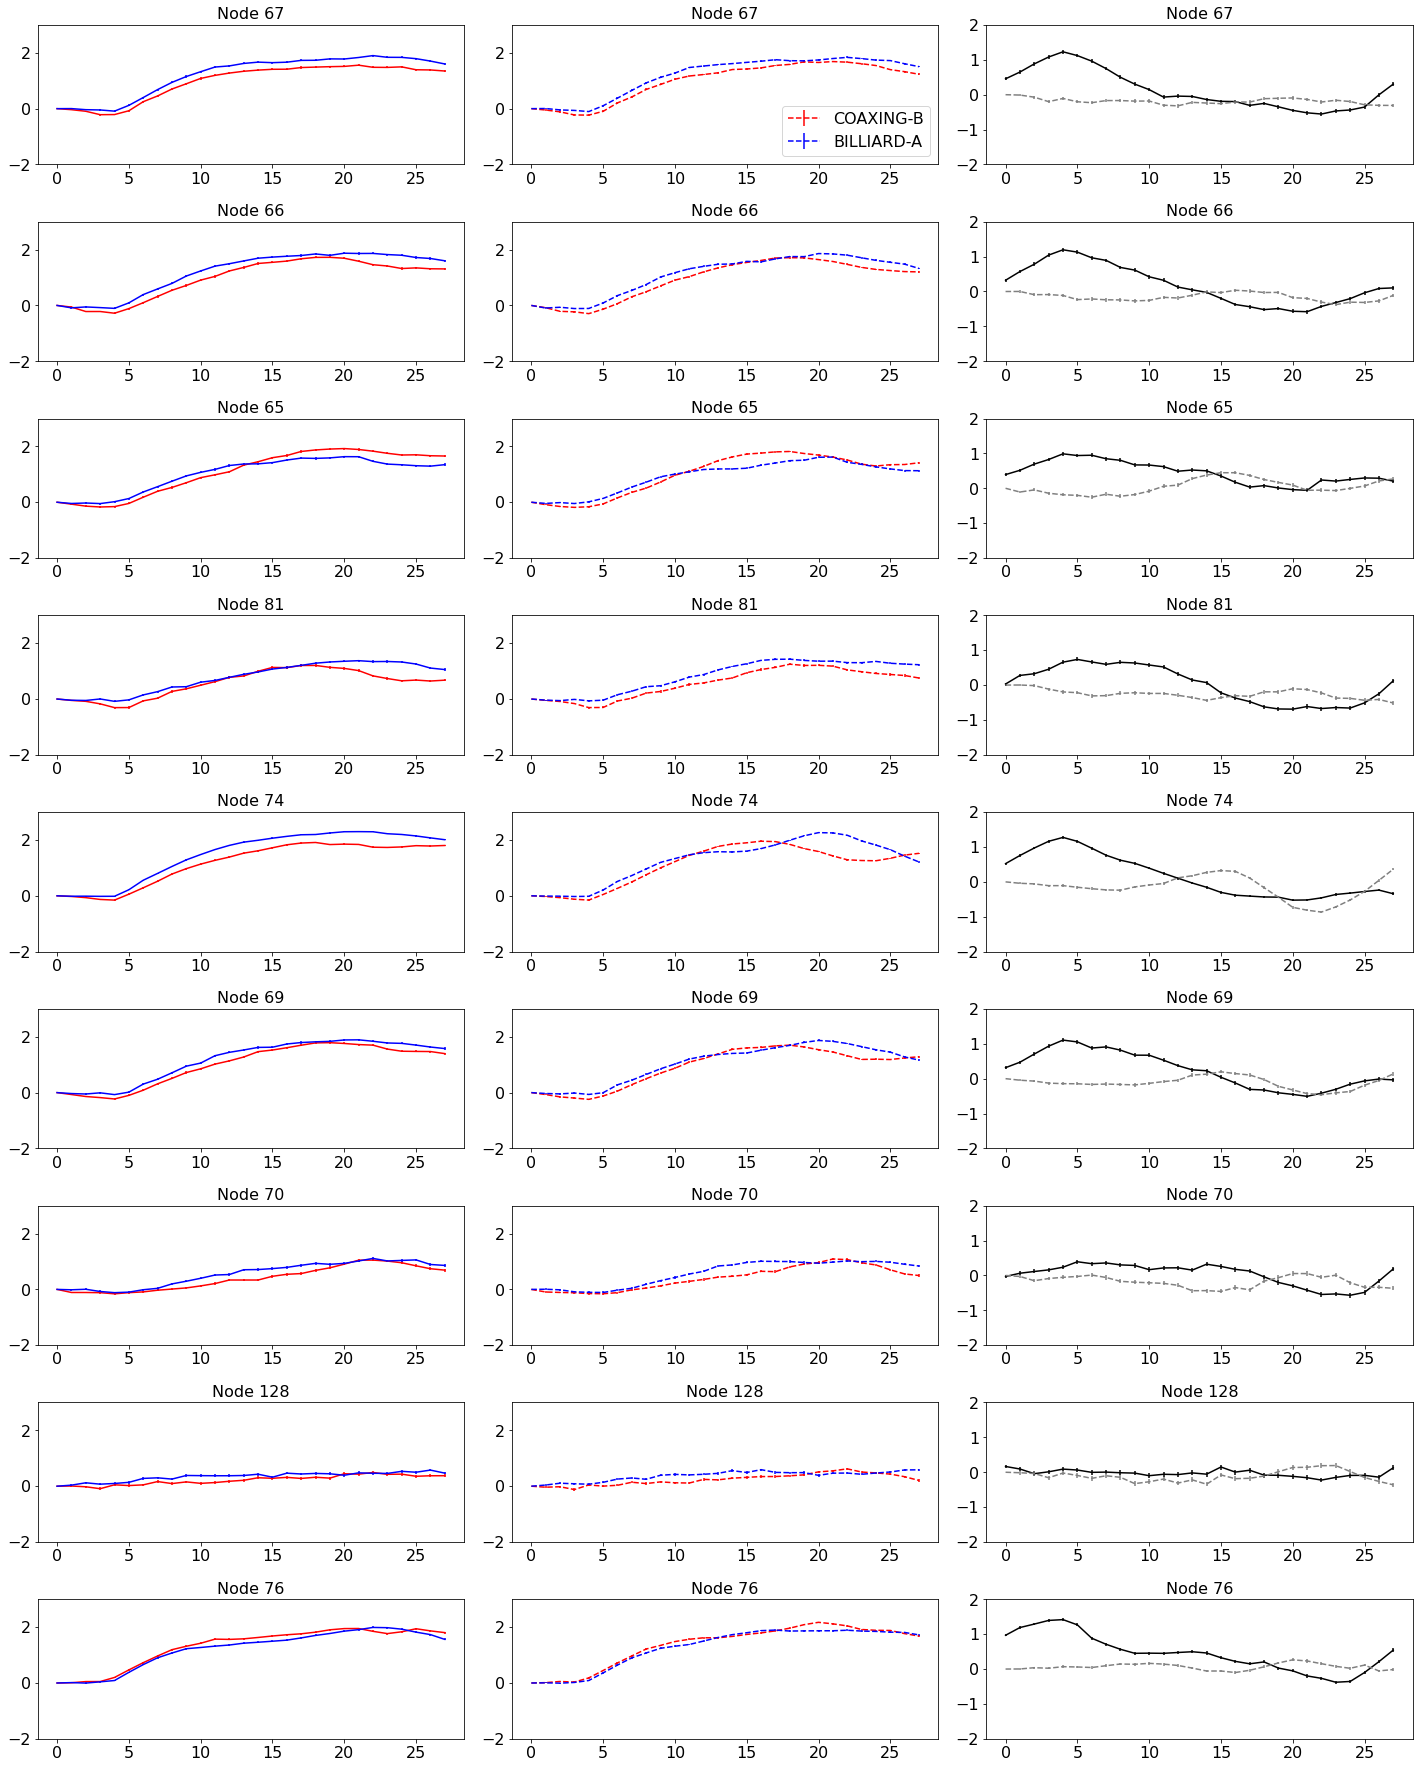

In [80]:
'''n = 65
plt.figure(1,figsize=(10,5))
for i in range(2):
    plt.subplot(1,2,i+1)
    tc_res = resid_tc[:,n,tr0_ind:,i]
    tc = tcs_trial_z[subs,n,tr0_ind:,i]
    plt.errorbar(range(28),np.nanmean(tc,axis=0),stats.sem(tc,axis=0),color='k',label='mean data')
    plt.plot((brightness_reg[tr0_ind:,i])/(max(brightness_reg[tr0_ind:,i])-min(brightness_reg[tr0_ind:,i])))
    plt.plot((of_reg[tr0_ind:,i])/(max(of_reg[tr0_ind:,i])-min(of_reg[tr0_ind:,i])))
    plt.errorbar(range(28),np.nanmean(tc_res,axis=0),stats.sem(tc_res,axis=0),color='k',ls='dashed',label = 'mean resid')
    plt.legend()
    plt.title(vidnames[i])'''

plt.figure(1,figsize=(20,30))
ncols = 3
for i,n in enumerate([66,65,64,80,73,68,69,127,75]):#df_minus10_0_right['Nodes'].values):
    #n = 65
    plt.subplot(11,ncols,i*ncols+1)
    col = ['r','b']
    plt.title('Node ' + str(n+1))
    for m in range(2):
        tc = tcs_trial_z[subs,n,vid_start_rel_tr[m]:vid_start_rel_tr[m]+28,m] #tcs_trial_z[subs,n,tr0_ind:,m]
        plt.errorbar(range(28),np.nanmedian(tc,axis=0),stats.sem(tc,axis=0),color=col[m],label=vidnames[m])
        #plt.plot((brightness_reg[tr0_ind:,i])/(max(brightness_reg[tr0_ind:,i])-min(brightness_reg[tr0_ind:,i])))
        #plt.plot((of_reg[tr0_ind:,i])/(max(of_reg[tr0_ind:,i])-min(of_reg[tr0_ind:,i])))
    plt.ylim(-2,3)
        
    plt.subplot(11,ncols,i*ncols+2)
    plt.title('Node ' + str(n+1))
    for m in range(2):
        tc_res = resid_tc[:,n,tr0_ind:,m]
        plt.errorbar(range(28),np.nanmedian(tc_res,axis=0),stats.sem(tc_res,axis=0),color=col[m],ls='dashed',label = vidnames[m])
        
    if i==0:
        plt.legend()#bbox_to_anchor=[1.01,1])
    plt.ylim(-2,3)

    plt.subplot(11,ncols,i*ncols+3)
    col = 'k'
    plt.title('Node ' + str(n+1))
    tc_diff = tcs_trial_z[subs,n,vid_start_rel_tr[m]:vid_start_rel_tr[m]+28,0] - tcs_trial_z[subs,n,vid_start_rel_tr[m]:vid_start_rel_tr[m]+28,1]
    #tcs_trial_z[subs,n,tr0_ind:,0] - tcs_trial_z[subs,n,tr0_ind:,1]
    plt.errorbar(range(28),np.nanmedian(tc_diff,axis=0),stats.sem(tc_diff,axis=0),color=col,label=f'{vidnames[1]}-\n{vidnames[0]}')


    plt.subplot(11,ncols,i*ncols+3)
    col = 'grey'
    plt.title('Node ' + str(n+1))
    resid_diff = resid_tc[subs,n,tr0_ind:,0] - resid_tc[subs,n,tr0_ind:,1]
    plt.errorbar(range(28),np.nanmedian(resid_diff,axis=0),stats.sem(resid_diff,axis=0),color=col,ls='--')#,label=f'{vidnames[1]}-\n{vidnames[0]}')
    #plt.legend()
    plt.ylim(-2,2)
    
plt.tight_layout()

# not soted early to late.

<AxesSubplot:>

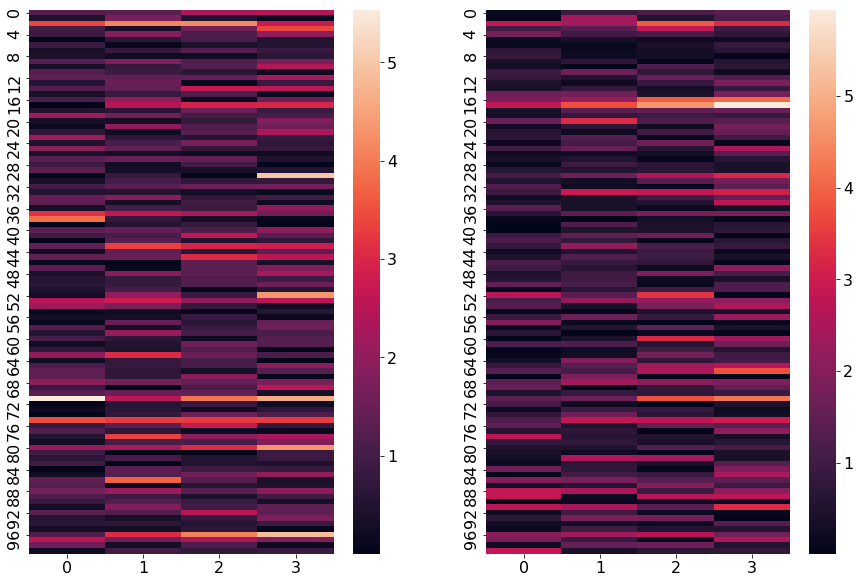

In [119]:
plt.figure(1,figsize=(15,10))
plt.subplot(121)
#  tcs_trial_z[subs,n,vid_start_rel_tr[m]:vid_start_rel_tr[m]+28,0] - tcs_trial_z[subs,n,vid_start_rel_tr[m]:vid_start_rel_tr[m]+28,1]
sns.heatmap(np.abs(tcs_trial_z[subs[:100],213,vid_start_rel_tr[m]:vid_start_rel_tr[m]+4,0] - tcs_trial_z[subs[:100],213,vid_start_rel_tr[m]:vid_start_rel_tr[m]+4,1]))

plt.subplot(122)
sns.heatmap(np.abs(resid_tc[subs[:100],213,tr0_ind+1:tr0_ind+5,0] - resid_tc[subs[:100],213,tr0_ind+1:tr0_ind+5,1]))